In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! pip install -Uq kaggle

In [ ]:
! pip install -Uq fastai

In [ ]:
! pip install -Uq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 103.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 115.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.3 MB/s eta 0:00:00


In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"luciancotolan","key":"0212046bcfc9607ecdc37e93d8bdb037"}'}

In [ ]:
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download nikitarom/planets-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip drive/MyDrive/AmazonImages/planets-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: test-jpg-additional/test-jpg-additional/file_5499.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_55.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_550.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5500.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5501.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5502.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5503.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5504.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5505.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5506.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5507.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5508.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5509.jpg  
  inflating: test-jpg-additional/test-jpg-additional/fi

In [ ]:
from fastai.vision.all import *
path = Path('./planet/planet')

In [ ]:
path.ls()

(#4) [Path('planet/planet/train-jpg'),Path('planet/planet/test-jpg'),Path('planet/planet/sample_submission.csv'),Path('planet/planet/train_classes.csv')]

In [ ]:
train_df = pd.read_csv(path/'train_classes.csv')
train_df

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
...,...,...
40474,train_40474,clear primary
40475,train_40475,cloudy
40476,train_40476,agriculture clear primary
40477,train_40477,agriculture clear primary road


Drop images that are cloudy

In [ ]:
train_df.drop(train_df[train_df["tags"] == "cloudy"].index, inplace=True)
#if the tags column contains the word 'habitation' then drop that row
train_df.drop(train_df[train_df["tags"].str.contains("habitation")].index, inplace=True)
train_df.drop(train_df[train_df["tags"].str.contains("haze")].index, inplace=True)
#train_df.drop(train_df[train_df["tags"].str.contains("road")].index, inplace=True)

In [ ]:
import pandas as pd

# lista de labels care sunt deforestare
keywords = ["agriculture","artisinal_mine","conventional_mine","road","cultivation","selective_logging","slash_burn"]

def check_tags(tags):
    for keyword in keywords:
        if keyword in tags:
            return "deforestation"
    return "not_deforestation"

# aplicam functia pe coloana tags pentru a crea coloana label
train_df["label"] = train_df["tags"].apply(check_tags)
train_df

,image_name,tags,label
1,train_1,agriculture clear primary water,deforestation
2,train_2,clear primary,not_deforestation
3,train_3,clear primary,not_deforestation
6,train_6,agriculture clear cultivation primary water,deforestation
8,train_8,agriculture clear cultivation primary,deforestation
...,...,...,...
40472,train_40472,agriculture clear primary,deforestation
40474,train_40474,clear primary,not_deforestation
40476,train_40476,agriculture clear primary,deforestation
40477,train_40477,agriculture clear primary road,deforestation


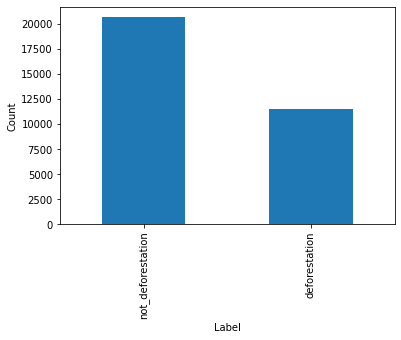

In [ ]:
import matplotlib.pyplot as plt

counts = train_df["label"].value_counts()
counts.plot(kind='bar')
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [ ]:
counts

not_deforestation    20675
deforestation        11487
Name: label, dtype: int64

In [ ]:
labels = train_df['label']

In [ ]:
def get_data(size=224,bs=64,data_df=train_df):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       splitter=TrainTestSplitter(test_size=0.2, random_state=42, stratify=labels),
                       get_x=ColReader(0, pref=f'{path}/train-jpg/', suff='.jpg'),
                       get_y=ColReader(2),
                       item_tfms = Resize(size),
                       batch_tfms = [*aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.),
                                     Normalize.from_stats(*imagenet_stats)]
                      )
    return dblock.dataloaders(data_df,bs=bs)

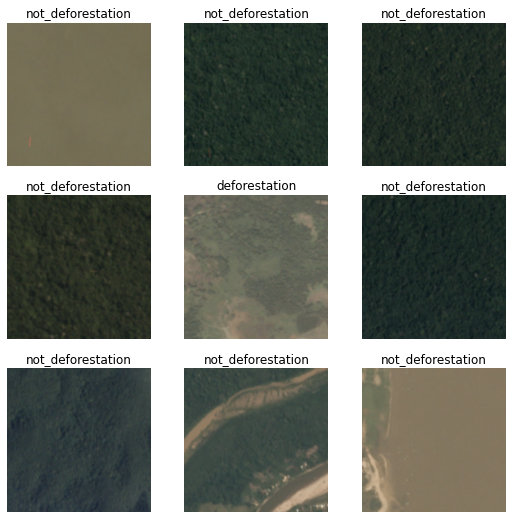

In [ ]:
dls = get_data(224,64)
dls.show_batch()

In [ ]:
f1score = F1Score(average='binary')
recall = Precision()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0008317637839354575)

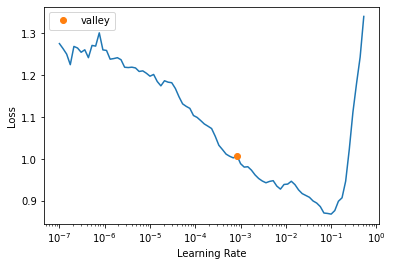

In [ ]:
learn = vision_learner(dls, resnet50, metrics=[f1score, recall]).to_fp16()
learn.lr_find()

In [ ]:
learn.fine_tune(4, base_lr=1e-3,freeze_epochs=4)

epoch,train_loss,valid_loss,f1_score,precision_score,time
0,0.402233,0.293939,0.913967,0.897251,02:28
1,0.334995,0.279787,0.910565,0.898142,02:25
2,0.286049,0.245322,0.921616,0.927714,02:27
3,0.252984,0.243301,0.921510,0.913302,02:28


epoch,train_loss,valid_loss,f1_score,precision_score,time
0,0.237244,0.220098,0.928724,0.912678,02:35
1,0.216052,0.202147,0.934372,0.940902,02:37
2,0.196268,0.194821,0.937328,0.928979,02:36
3,0.178152,0.197202,0.936508,0.931356,02:36


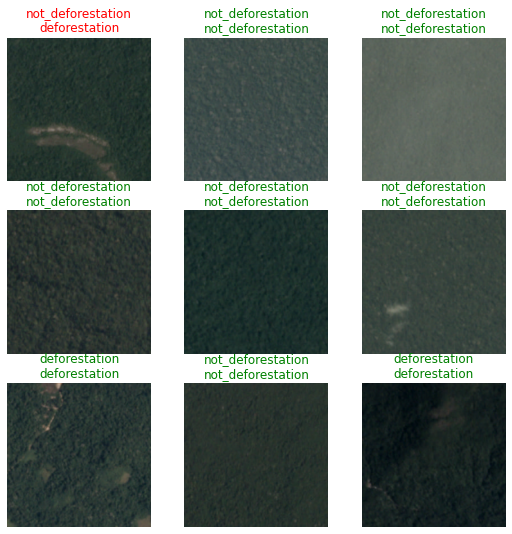

In [ ]:
learn.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

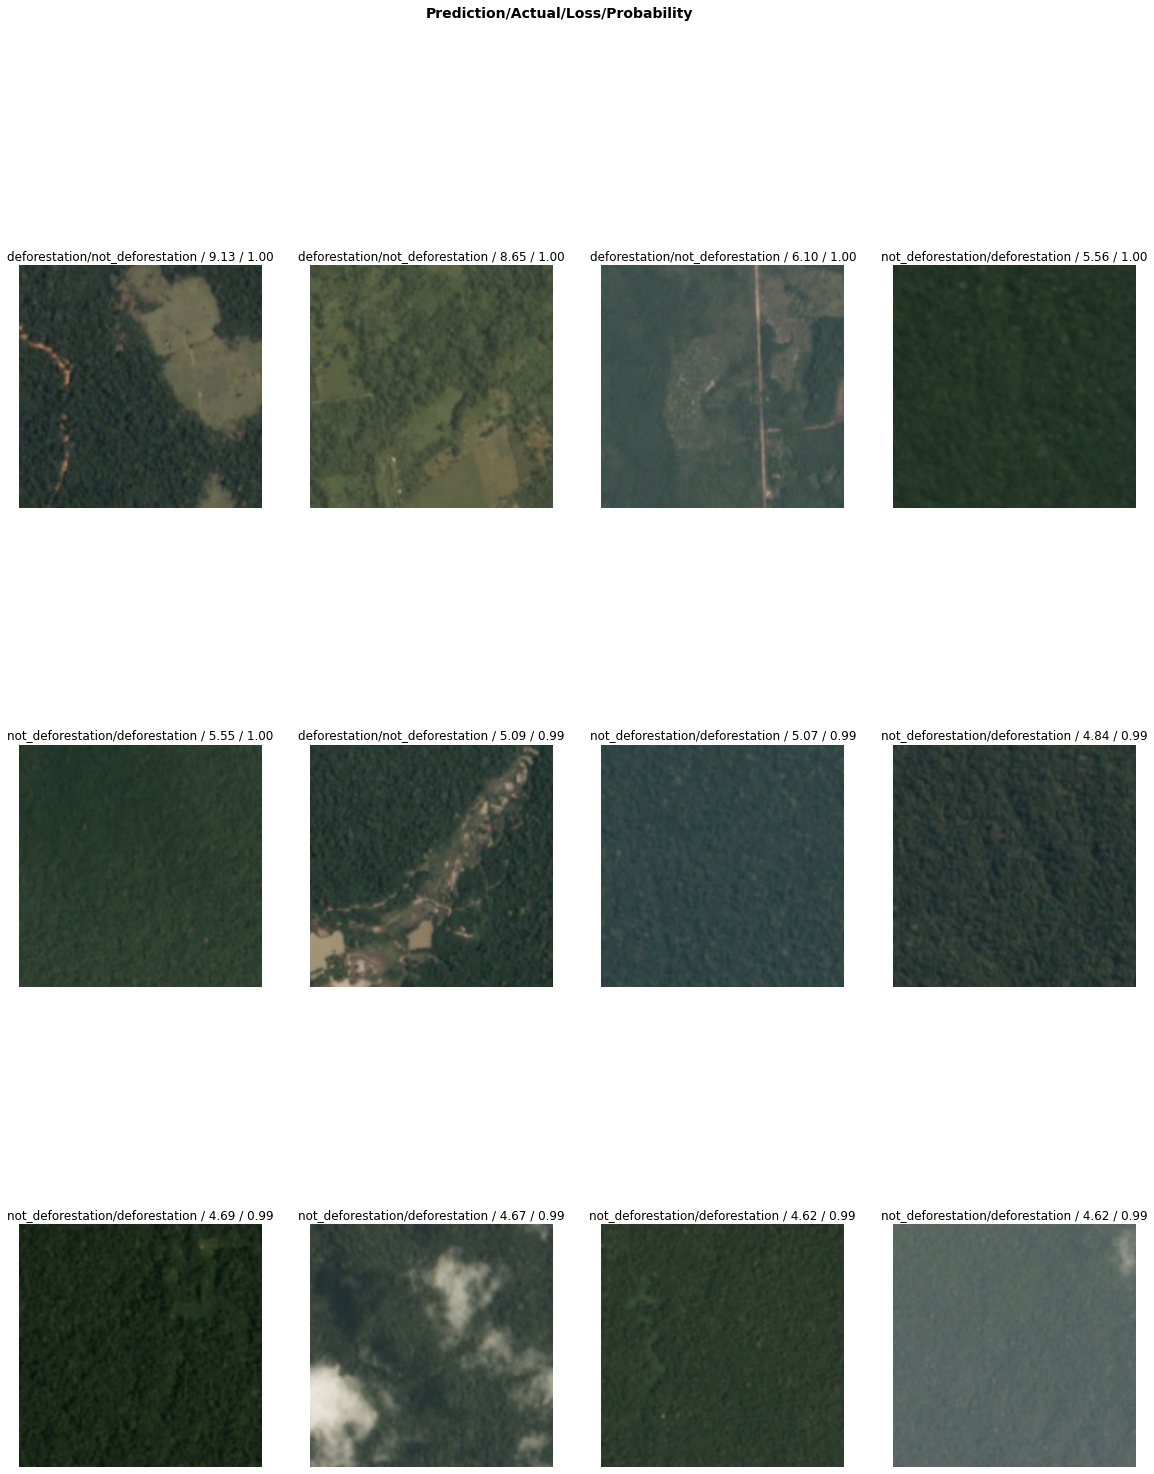

In [ ]:
interp.plot_top_losses(12, figsize=(20,25))

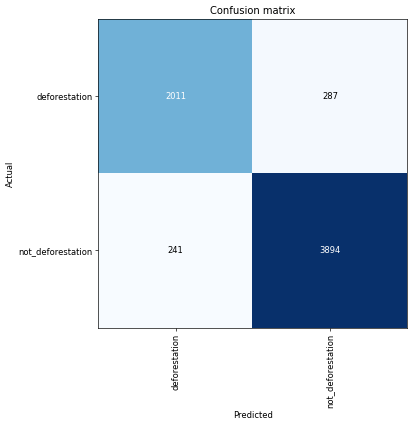

In [ ]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

In [ ]:
learn.export('resnet50_m2.pkl')

In [ ]:
!unzip /content/drive/MyDrive/RomaniaImages/fragments.zip

Streaming output truncated to the last 5000 lines.
  inflating: fragments/fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T35TLN_20220722T134859_66_38.jpg  
  inflating: fragments/fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T35TLN_20220722T134859_66_39.jpg  
  inflating: fragments/fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T35TLN_20220722T134859_66_4.jpg  
  inflating: fragments/fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T35TLN_20220722T134859_66_40.jpg  
  inflating: fragments/fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T35TLN_20220722T134859_66_41.jpg  
  inflating: fragments/fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T35TLN_20220722T134859_66_42.jpg  
  inflating: fragments/fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T35TLN_20220722T134859_66_43.jpg  
  inflating: fragments/fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T35TLN_20220722T134859_66_44.jpg  
  inflating: fragments/fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T35TLN_20220722T134859_66_45.jpg  
  inf

In [ ]:
! pip install -Uq fastai

In [ ]:
from fastai.vision.all import *

In [ ]:
inference = load_learner('/content/drive/MyDrive/RomaniaImages/resnet50.pkl', cpu=False)

In [ ]:
test_path = Path('fragments')
submission_df = pd.read_csv('/content/drive/MyDrive/RomaniaImages/test-jpg.csv')
submission_df.drop(submission_df[submission_df["label"] == "excluded"].index, inplace=True)
testing_path = (submission_df['image']).apply(lambda x: test_path/x)

tst_dl = inference.dls.test_dl(testing_path)

predictions = inference.get_preds(dl=tst_dl)

In [ ]:
predictions

(TensorBase([[0.7429, 0.2571],
             [0.9763, 0.0237],
             [0.9931, 0.0069],
             ...,
             [0.3326, 0.6674],
             [0.7449, 0.2551],
             [0.1932, 0.8068]]), None)

In [ ]:
# Get the predicted class probabilities
pred_probs = predictions[0]

# Get the predicted class labels using argmax
pred_labels = [inference.dls.vocab[i] for i in pred_probs.argmax(dim=1)]

# Create a dataframe with the image names and predicted labels
preds = submission_df
preds['predicted label'] = pred_labels

In [ ]:
# Create a new column in the "preds" data frame that contains the probability of the correct class
pred_probs_max, _ = torch.max(pred_probs, dim=1)
pred_probs_min, _ = torch.min(pred_probs, dim=1)
preds['probability of correct class'] = pred_probs_max.numpy()
preds['probability of incorrect class'] = pred_probs_min.numpy()
preds['diff'] = preds['probability of correct class'] - preds['probability of incorrect class']

In [ ]:
incorrect_df = preds[preds["label"] != preds["predicted label"]]

In [ ]:
incorrect_df

,image,label,predicted label,probability of correct class,probability of incorrect class,diff
5,fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T34TFR_20220722T134859_10_18.jpg,deforestation,not_deforestation,0.621656,0.378344,0.243312
10,fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T34TFR_20220722T134859_10_33.jpg,deforestation,not_deforestation,0.589598,0.410402,0.179196
11,fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T34TFR_20220722T134859_10_34.jpg,deforestation,not_deforestation,0.783533,0.216467,0.567067
12,fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T34TFR_20220722T134859_10_37.jpg,deforestation,not_deforestation,0.633807,0.366193,0.267614
20,fragment_S2A_MSIL2A_20220722T092041_N0400_R093_T34TFR_20220722T134859_10_52.jpg,deforestation,not_deforestation,0.507446,0.492554,0.014891
...,...,...,...,...,...,...
2655,fragment_S2A_MSIL2A_20220725T093041_N0400_R136_T34TFS_20220725T140223_6_42.jpg,not_deforestation,deforestation,0.569703,0.430297,0.139406
2656,fragment_S2A_MSIL2A_20220725T093041_N0400_R136_T34TFS_20220725T140223_6_50.jpg,not_deforestation,deforestation,0.603567,0.396433,0.207134
2657,fragment_S2A_MSIL2A_20220725T093041_N0400_R136_T34TFS_20220725T140223_6_51.jpg,not_deforestation,deforestation,0.875202,0.124798,0.750403
2659,fragment_S2A_MSIL2A_20220725T093041_N0400_R136_T34TFS_20220725T140223_7_51.jpg,not_deforestation,deforestation,0.547222,0.452778,0.094444


In [ ]:
incorrect_df.reset_index(drop=True, inplace=True)

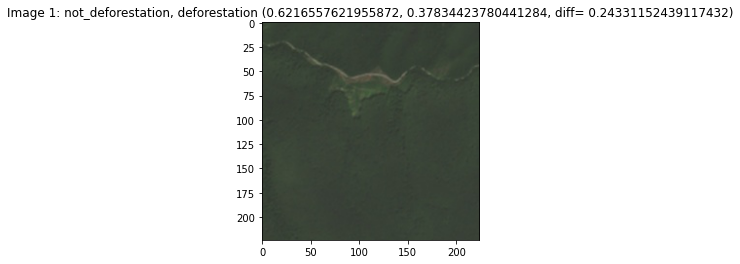

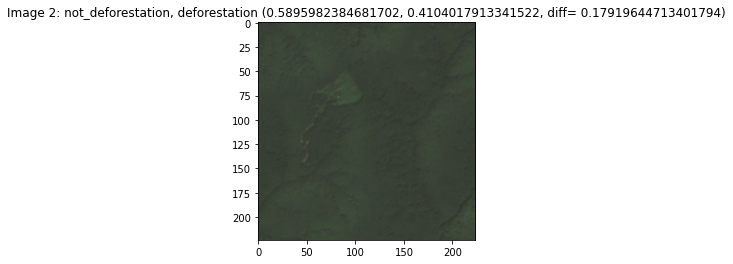

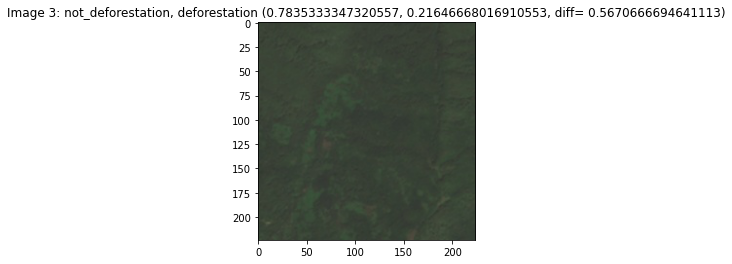

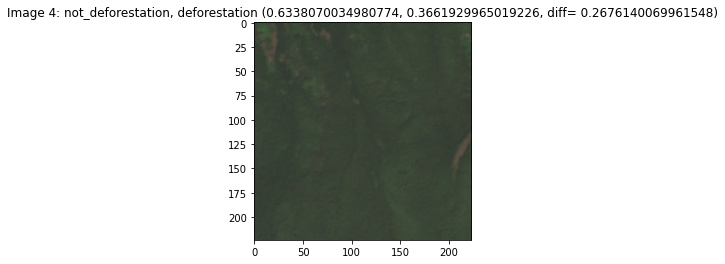

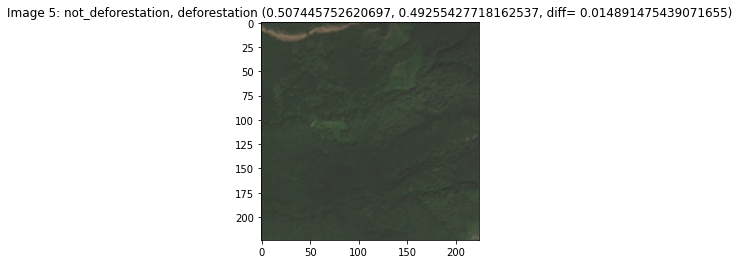

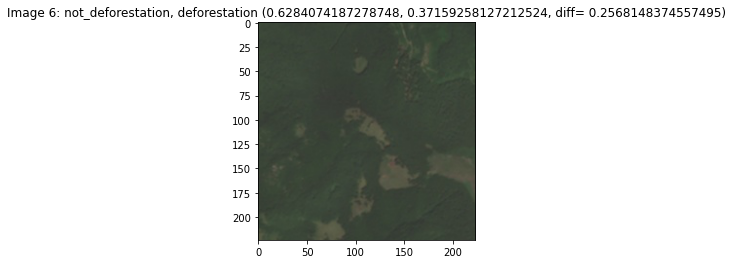

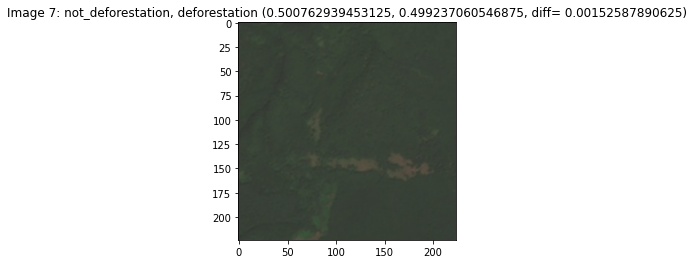

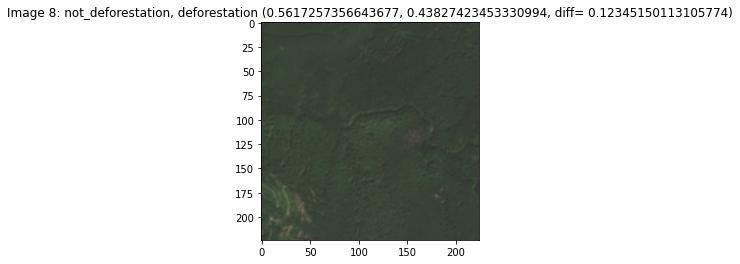

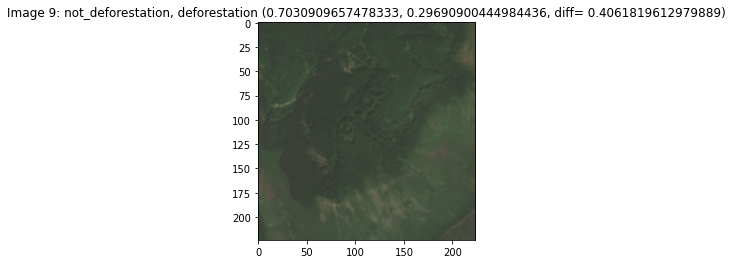

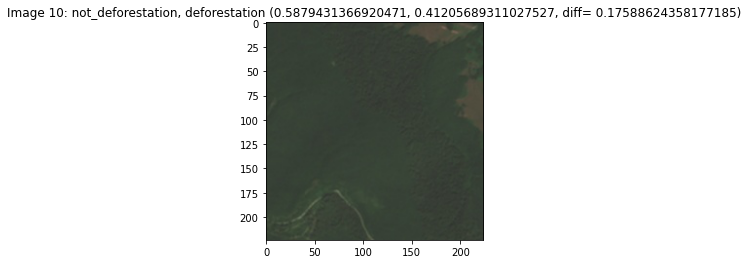

In [ ]:
# Plot the first 10 images
for i in range(10):
    image_path = 'fragments/'+str(incorrect_df['image'][i])
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.title(f"Image {i+1}: {preds.iloc[i]['predicted label']}, {preds.iloc[i]['label']} ({incorrect_df.iloc[i]['probability of correct class']}, {incorrect_df.iloc[i]['probability of incorrect class']}, diff= {incorrect_df.iloc[i]['diff']})")
    plt.show()

In [ ]:
# Create a confusion matrix
cm = pd.crosstab(preds['label'], preds['predicted label'], rownames=['True'], colnames=['Predicted'], margins=False)

In [ ]:
cm

Predicted,deforestation,not_deforestation
True,,
deforestation,1774,221
not_deforestation,310,359


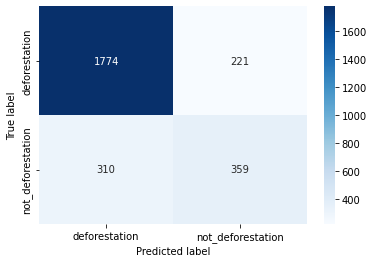

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Get the true labels and predicted labels as numpy arrays
true_labels_array = preds['label'].to_numpy()
pred_labels_array = preds['predicted label'].to_numpy()

# Get a classification report
print(classification_report(true_labels_array, pred_labels_array))

                   precision    recall  f1-score   support

    deforestation       0.85      0.89      0.87      1995
not_deforestation       0.62      0.54      0.57       669

         accuracy                           0.80      2664
        macro avg       0.74      0.71      0.72      2664
     weighted avg       0.79      0.80      0.80      2664



In [ ]:
# Get the number of incorrect predictions
incorrect_predictions = (true_labels_array != pred_labels_array).sum()

# Calculate the misclassification error
misclassification_error = incorrect_predictions / len(true_labels_array)

# Print the misclassification error
print(f'Misclassification error: {misclassification_error:.4f}')


Misclassification error: 0.1993
